In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn import tree

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 100})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
# Need to drop NA's specific to provstate column
gtd_ProvinceDF = gtdDF.dropna(subset=['provstate'])
gtd_ProvinceDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,claimmode_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,None,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0


In [6]:
casualties = gtd_ProvinceDF['nkill'] + gtd_ProvinceDF['nwound']
casualties.sum()

554078.0

In [7]:
gtd_ProvinceDF['casualties'] = gtd_ProvinceDF['nkill'] + gtd_ProvinceDF['nwound']
gtd_ProvinceDF.head()

C:\Users\kruiz\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1,casualties
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0,7.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0,7.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0,1.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0,16.0


In [8]:
ProvinceAttacksDF = gtd_ProvinceDF[['index1','provstate','casualties']]
ProvinceAttacksDF.head()

,index1,provstate,casualties
0,1.0,Kavango,7.0
1,2.0,Kavango,7.0
2,3.0,Jammu and Kashmir,3.0
3,4.0,Kosovo (Province),1.0
4,5.0,Banaadir,16.0


In [9]:
gtd_ProvinceDF['attacktype1_txt'].count()

92646

In [10]:
ProvinceAttacks2DF = pd.get_dummies(ProvinceAttacksDF)
ProvinceAttacks2DF.head()

,index1,casualties,provstate_(Region) of Republican Subordination (Province),provstate_(Republic of) Ingushetia,provstate_Abia,provstate_Abkhazia,provstate_Abkhazia (Autonomous Region),provstate_Abkhazia (Autonomous Republic),provstate_Abkhazia (Region),provstate_Abra,...,provstate_Zubin Potok,provstate_Zug,provstate_Zugdidi,provstate_Zulia,provstate_Zurich,provstate_khon kaen,provstate_phayao,provstate_sakon nakhon,provstate_samut prakan,provstate_sulawesi utara
0,1.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,16.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ProvinceAttacks2DF = ProvinceAttacks2DF.rename(columns = {
    'provstate_Baghdad':'Baghdad', 
    'provstate_Balochistan': 'Balochistan',
    'provstate_Saladin':'Saladin',
    'provstate_Khyber Pakhtunkhwa':'Khyber Pakhtunkhwa',
    'provstate_Al Anbar':'Al Anbar',
    'provstate_Diyala':'Diyala',
    'provstate_Nineveh':'Nineveh',
    'provstate_Federally Administered Tribal Areas':'Federally Administered Tribal Areas',
    'provstate_Sindh':'Sindh',
    'provstate_Jammu and Kashmir':'Jammu and Kashmir'
    })

In [12]:
ProvinceAttacksMergeDF = result = pd.merge(ProvinceAttacks2DF,ProvinceAttacksDF[['index1','provstate']],on='index1')
ProvinceAttacksMergeDF.head()

,index1,casualties,provstate_(Region) of Republican Subordination (Province),provstate_(Republic of) Ingushetia,provstate_Abia,provstate_Abkhazia,provstate_Abkhazia (Autonomous Region),provstate_Abkhazia (Autonomous Republic),provstate_Abkhazia (Region),provstate_Abra,...,provstate_Zug,provstate_Zugdidi,provstate_Zulia,provstate_Zurich,provstate_khon kaen,provstate_phayao,provstate_sakon nakhon,provstate_samut prakan,provstate_sulawesi utara,provstate
0,1.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kavango
1,2.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kavango
2,3.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jammu and Kashmir
3,4.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kosovo (Province)
4,5.0,16.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Banaadir


In [13]:
# Assign X (data) and y (target)
X = ProvinceAttacksMergeDF.drop(["provstate","index1","casualties"], axis=1)
y = ProvinceAttacksMergeDF["provstate"]
feature_names = X.columns

print(X.shape, y.shape)

(92646, 1925) (92646,)


In [14]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9901131163111994

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9901131163111994

In [17]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.06752536797239105, 'Baghdad'),
 (0.03345788067178251, 'Balochistan'),
 (0.031426675773487386, 'Saladin'),
 (0.030334627678878064, 'Khyber Pakhtunkhwa'),
 (0.027940059222417376, 'Al Anbar'),
 (0.027545034754963213, 'Diyala'),
 (0.024982031866889257, 'Nineveh'),
 (0.022287588394941996, 'Federally Administered Tribal Areas'),
 (0.020179896589149534, 'Sindh'),
 (0.015327469479038548, 'Jammu and Kashmir'),
 (0.014521091002690193, 'provstate_Kirkuk'),
 (0.011913786203604384, 'provstate_Banaadir'),
 (0.011623366137329647, 'provstate_Helmand'),
 (0.011052100199213898, 'provstate_Babil'),
 (0.01090317952018963, 'provstate_Kandahar'),
 (0.010872274675907236, 'provstate_North Sinai'),
 (0.00992349409708842, 'provstate_Pattani'),
 (0.009734197846113546, 'provstate_West Bank'),
 (0.009572396293109615, 'provstate_Manipur'),
 (0.009301746928953632, 'provstate_Narathiwat'),
 (0.009278305677901224, 'provstate_Donetsk'),
 (0.009172365640742539, 'provstate_Chhattisgarh'),
 (0.008734193762888748, 'pro

In [18]:
RFProvinceDF = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True), columns = ['Probability', 'Province'])
RFProvinceDF.head(10)

,Probability,Province
0,0.067525,Baghdad
1,0.033458,Balochistan
2,0.031427,Saladin
3,0.030335,Khyber Pakhtunkhwa
4,0.027940,Al Anbar
5,0.027545,Diyala
6,0.024982,Nineveh
7,0.022288,Federally Administered Tribal Areas
8,0.020180,Sindh
9,0.015327,Jammu and Kashmir


In [19]:
RFProvinceTop10DF = RFProvinceDF.head(10)
RFProvinceTop10DF

,Probability,Province
0,0.067525,Baghdad
1,0.033458,Balochistan
2,0.031427,Saladin
3,0.030335,Khyber Pakhtunkhwa
4,0.027940,Al Anbar
5,0.027545,Diyala
6,0.024982,Nineveh
7,0.022288,Federally Administered Tribal Areas
8,0.020180,Sindh
9,0.015327,Jammu and Kashmir


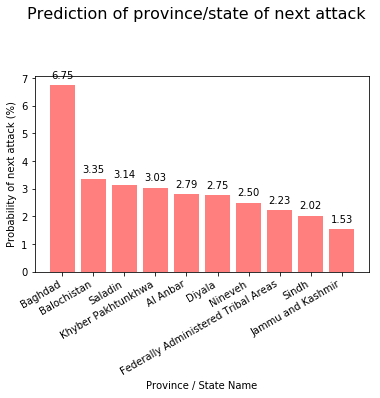

In [20]:
y_axis = RFProvinceTop10DF['Probability']*100
x_axis = RFProvinceTop10DF['Province']
fig, ax = plt.subplots()
# plot
ax.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# Labels for x and y axes
plt.xlabel("Province / State Name")
plt.ylabel("Probability of next attack (%)")

# Show the values of each probability on plot
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

# Save an image of our chart and print the final product to the screen
plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML9_Province_Attacks_Bar_RF")
# Title for the chart
plt.suptitle('Prediction of province/state of next attack', size=16, y=1.12) 
plt.show()